# Predicting High Quality Wine


## Goals:

- Find drivers of quality in wine dataset. Why are some wines rated higher in quality than others?
- Construct a ML model that accurately predicts the quality of wines.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import re

#import acquire as a
import prepare as p
import explore as e
import modeling as m

# Acquire

- Data acquired from Kaggle, downloaded as a CSV.
- Data contained 1143 rows and 14 columns before preparation.
- Each row represents a single wine.
- Each column represents a feature that describes the wines.

In [2]:
# acquiring data
df = pd.read_csv('WineQT.csv')

# Prepare

- Checked for nulls (there were none)
- Added a feature for marking a wine as a viable product or not.
- Split data into train, validate, and test datasets, stratifying on 'quality'.

In [3]:
# creating is_viable feature
df = p.create_viable(df)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_viable
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,False


In [5]:
# splitting the data
train, validate, test = p.split_wine(df)

# Data Dictionary
| Feature | Definition |
| :- | :- |
| quality | a numeric score based on reviews of the wine by consumers |
| fixed acidity | set of low volatility organic acids such as malic, lactic, tartaric or citric acids. |
| volatile acidity | a measure of the wine's volatile (or gaseous) acids. The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar. |
| citric acid | a measure of acid that is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. |
| residual sugar | sweetness in wine measured in grams per liter (g/L) of sugar. |
| chlorides | a measure of salts of mineral and organic acids that affects the saltiness of flavor in wine. |
| free sulfur dioxide | a measure of sulphur dioxide ions that are not chemically bound to other chemicals in solution and thus are free to react with substances |
| density | mass of a unit volume of a material substance (in this case, the wine) |
| pH | a figure expressing the acidity or alkalinity of a solution (in this case, the wine) |
| sulphites | continuous variable, measured in ppm (parts per million), naturally occurring compounds found in all wines; they act as a preservative by inhibiting microbial growth.  |
| alcohol | measurement of alcohol content in wine |

# Explore

> Does volatile acidity share a relationship with quality?

> Does citric acid share a relationship with quality?

> Does fixed acidity share a relationship with quality?

> Does pH share a relationship with quality?

> Does sulphates share a relationship with quality?

> Does alcohol share a relationship with quality?

> Does residual sugar share a relationship with quality?

> Does free sulphur dioxide share a relationship with quality?

## Countplot of quality

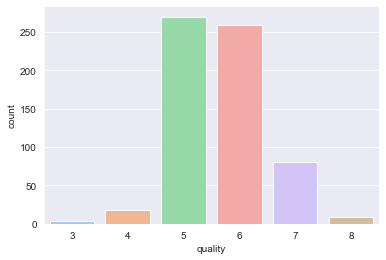

In [6]:
# countplot of quality
e.get_countplot(train)

## Countplot of is_viable

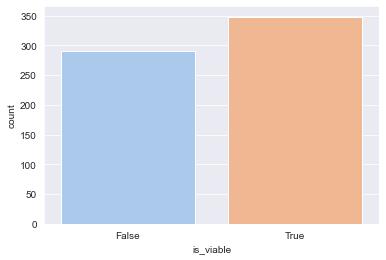

In [7]:
# countplot of is_viable
e.get_countplot_viable(train)

## Does 'volatile acidity' share a relationship with 'is_viable'?

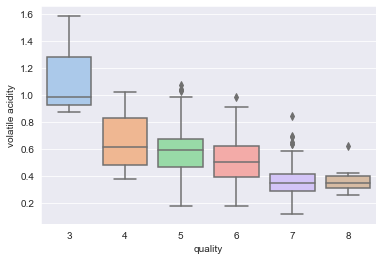

In [8]:
# boxplot of volatile acidity
e.get_volatile_boxplot(train)

#### I will use an independent t-test between two sample groups to determine if 'volatile acidity' and 'is_viable' are related.

>One group will contain the volatile acidity of wines that are not viable.

>The second group will contain the volatile acidity of wines that are viable.

>I will use a confidence interval of 95% with alpha set to .05

In [9]:
# t-test of volatile acidity
e.get_ttest_volatile(train)

t     = 8.8387
p     = 0.0000


### The p-value is lower than our alpha, giving us the evidence to support that a relationship exists between 'volatile acidity' and 'is_viable'. With our null hypothesis rejected, and the signifcant difference in volatile acidity between customers who have churned and customers who have not churned, I believe that using the 'Tenure' feature will have a significant positive impact on the model's accuracy.

## Does 'citric acid' share a relationship with 'is_viable'?

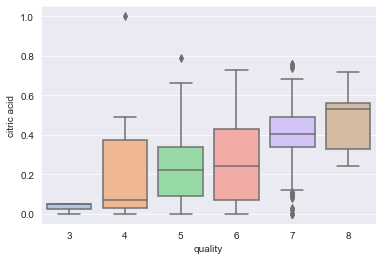

In [10]:
# boxplot of citric acid
e.get_citric_boxplot(train)

#### I will use an independent t-test between two sample groups to determine if 'citric acid' and 'is_viable' are related.

>One group will contain the citric acid of wines that are not viable.

>The second group will contain the citric acid of wines that are viable.

>I will use a confidence interval of 95% with alpha set to .05

In [11]:
# t-test of citric acid
e.get_ind_ttest_citric_acid(train)

t     = -4.1518
p     = 0.0000


## Does fixed acidity share a relationship with quality?

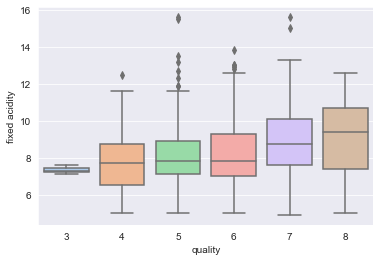

In [12]:
# boxplot of fixed acidity and quality
e.get_fixed_acid_boxplot(train)

In [13]:
# t-test of fixed acidity and quality
e.get_ind_ttest_fixed_acid(train)

t     = -2.4383
p     = 0.0150


## Does pH share a relationship with quality?

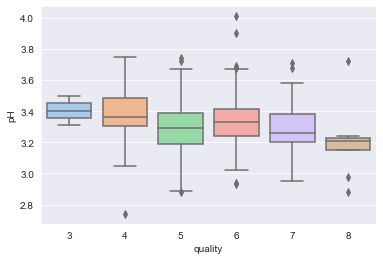

In [14]:
# boxplot of pH
e.get_pH_boxplot(train)

In [15]:
# t-test of pH
e.get_ind_ttest_ph(train)

t     = -1.5322
p     = 0.1260


## Does sulphates share a relationship with quality?

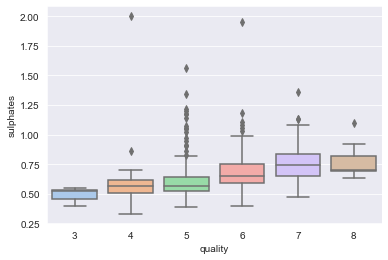

In [16]:
# boxplot of sulphates vs quality
e.get_sulphates_boxplot(train)

In [17]:
e.get_ind_ttest_sulphates(train)

t     = -6.8459
p     = 0.0000


## Does alcohol share a relationship with quality?

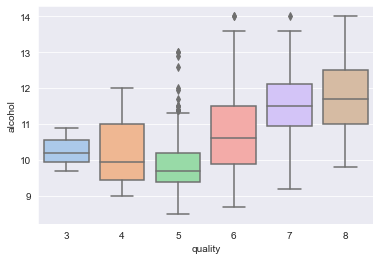

In [18]:
e.get_alcohol_boxplot(train)

In [19]:
e.get_ind_ttest_alcohol(train)

t     = -14.1206
p     = 0.0000


## Does residual sugar share a relationship with quality?

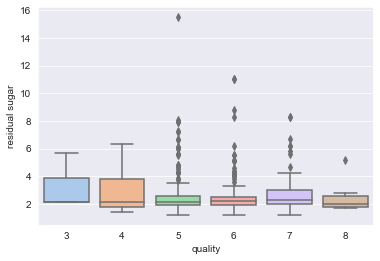

In [20]:
e.get_residual_sugar_boxplot(train)

In [21]:
e.get_ind_ttest_residsugar(train)

t     = 0.0569
p     = 0.9546


## Does free sulphur dioxide share a relationship with quality?

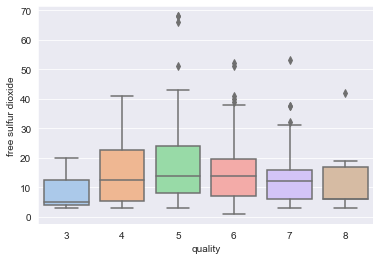

In [22]:
e.get_free_sulf_dio_boxplot(train)

In [23]:
e.get_ind_ttest_free_sulf_dio(train)

t     = 2.5557
p     = 0.0109


# Modeling

In [24]:
train_x, validate_x, test_x, train_y, validate_y, test_y = m.model_prep(train, validate, test)

In [25]:
m.get_tree(train_x, validate_x, train_y, validate_y)

Accuracy of Decision Tree on train data is 0.7856025039123631
Accuracy of Decision Tree on validate data is 0.7163636363636363


In [26]:
m.get_rf(train_x, validate_x, train_y, validate_y)

Accuracy of Random Forest on train data is 0.8184663536776213
Accuracy of Random Forest on validate data is 0.7527272727272727


In [27]:
m.get_reg(train_x, validate_x, train_y, validate_y)

Accuracy of Logistic Regression on train is 0.7449139280125195
Accuracy of Logistic Regression on validate is 0.72


In [28]:
m.get_knn(train_x, validate_x, train_y, validate_y)

Accuracy of KNN on train is 0.7652582159624414
Accuracy of KNN on validate is 0.6654545454545454


# Random Forest on Test

In [29]:
m.get_rf_test(train_x, validate_x, train_y, validate_y)

Accuracy of Random Forest on train data is 0.8184663536776213
Accuracy of Random Forest on test data is 0.7527272727272727


# Conclusion